In [6]:
import os

def adjust_wkdir(cut_folder='notebook'):
    abspath = os.path.abspath('.')
    wk_dir = abspath.replace(cut_folder,'')
    os.chdir(wk_dir)
    return wk_dir


adjust_wkdir()
!pwd 

/share/felix/pj/fine_grained_neumonia_classification


In [2]:
import matplotlib.pyplot as plt
from glob import glob

In [3]:
from dataset.dataLoader import dataLoader
from configurations.paths import paths, file_names

from dataset.splitDataset import getIndicesTrainValidTest
train_indices, valid_indices, test_indices = getIndicesTrainValidTest()
dataroot = os.path.join(paths['data']['datainfo_path'], file_names['data']['data_hdf5_file'])
train_loader, valid_loader, test_loader, cls_weights = \
        dataLoader(dataroot, train_indices, valid_indices, test_indices, 2, batch_size=2, trans=True)

160
0 128
128 144
Total number of patients (train + valid + test) :160
Patient count in train set:128
Patient count in valid set:16
Patient count in test set:16
Images count in Train set:23717
Images count in Valid set:2871,
Images count in Test set:2913


In [4]:
%%time
import os
from functools import partial
from preprocessing.full_prep import savenpy

data_path = './input/stage1'
prep_folder = './output/prep_result_npz/'


filelist = [f for f in os.listdir(data_path)]
#print(filelist)

savenpy(0, filelist=filelist,
        prep_folder=prep_folder,
        data_path=data_path,
        use_existing=False)

 

/home/felix/.local/lib/python3.7/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/felix/.local/lib/python3.7/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


save to  ./output/prep_result_npz/e6d4a747235bfcc1feac759571c8485c_clean
CPU times: user 1min 57s, sys: 1min 39s, total: 3min 36s
Wall time: 2min 49s


(310, 199, 290)


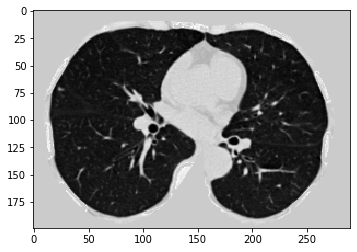

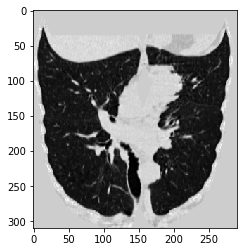

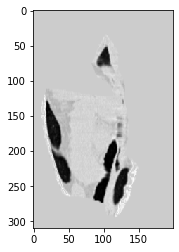

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image = np.load('./output/prep_result_npz/e6d4a747235bfcc1feac759571c8485c_clean.npy')[0]
print(image.shape)
plt.imshow(image[150,:, :], cmap='gray') ; plt.show()
plt.imshow(image[:,100, :], cmap='gray') ; plt.show()
plt.imshow(image[:,:, 150], cmap='gray') ; plt.show()